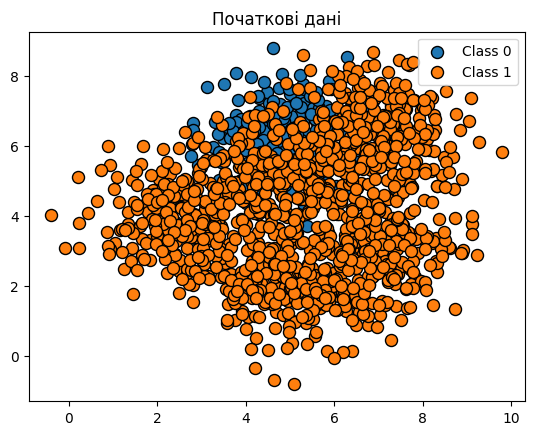

Розподіл класів до обробки: {0.0: 250, 1.0: 1250}
Розподіл класів після балансування: {0.0: 1250, 1.0: 1250}

Матриця плутанини:
[[296   1]
 [ 37 291]]

Звіт про класифікацію:
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       297
         1.0       1.00      0.89      0.94       328

    accuracy                           0.94       625
   macro avg       0.94      0.94      0.94       625
weighted avg       0.95      0.94      0.94       625



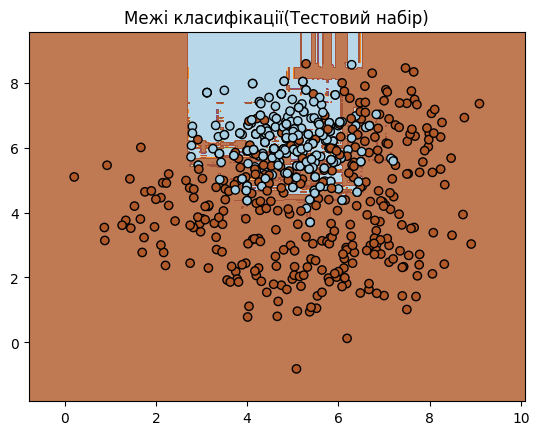

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample

# Завантаження даних
data = np.loadtxt('data_imbalance.txt', delimiter=',')
X, y = data[:, :-1], data[:, -1]

# Візуалізація початкових даних
class_0 = X[y == 0]
class_1 = X[y == 1]

plt.figure()
plt.scatter(class_0[:, 0], class_0[:, 1], s=75, label="Class 0", edgecolors="black")
plt.scatter(class_1[:, 0], class_1[:, 1], s=75, label="Class 1", edgecolors="black")
plt.title("Початкові дані")
plt.legend()
plt.show()

# Аналіз дисбалансу
unique, counts = np.unique(y, return_counts=True)
print("Розподіл класів до обробки:", dict(zip(unique, counts)))

# Балансування даних
X_class_0 = X[y == 0]
X_class_1 = X[y == 1]

if counts[0] > counts[1]:
  X_class_1_resampled = resample(X_class_1, replace=True, n_samples=counts[0], random_state=42)
  X_resampled = np.vstack((X_class_0, X_class_1_resampled))
  y_resampled = np.hstack((np.zeros(len(X_class_0)),np.ones(len(X_class_1_resampled))))
else:
  X_class_0_resampled = resample(X_class_0, replace=True, n_samples=counts[1], random_state=42)
  X_resampled = np.vstack((X_class_0_resampled, X_class_1))
  y_resampled = np.hstack((np.zeros(len(X_class_0_resampled)),np.ones(len(X_class_1))))

# Перевірка після балансування
unique, counts = np.unique(y_resampled, return_counts=True)
print("Розподіл класів після балансування:", dict(zip(unique, counts)))

# Розділення на навчальний і тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
test_size=0.25, random_state=42)

# Побудова класифікатора
classifier = RandomForestClassifier(n_estimators=100, class_weight='balanced',random_state=42)
classifier.fit(X_train, y_train)

# Оцінка якості моделі
y_pred = classifier.predict(X_test)
print("\nМатриця плутанини:")
print(confusion_matrix(y_test, y_pred))
print("\nЗвіт про класифікацію:")
print(classification_report(y_test, y_pred))

# Візуалізація меж класифікації
def plot_decision_boundaries(classifier, X, y, title):
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))
  Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
  plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
  plt.title(title)
  plt.show()

plot_decision_boundaries(classifier, X_test, y_test, "Межі класифікації(Тестовий набір)")